<a href="https://colab.research.google.com/github/anushka012/Text-Extraction-Model/blob/main/Text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the necessary dependencies**

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (214 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155623 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 19 kB/s 
     |████████████████████████████████| 37.1 MB 48 kB/s 


**Install the necessary libraries**

In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
images = convert_from_path('/content/Human Geography.pdf')

**Displaying the pdf in image format**

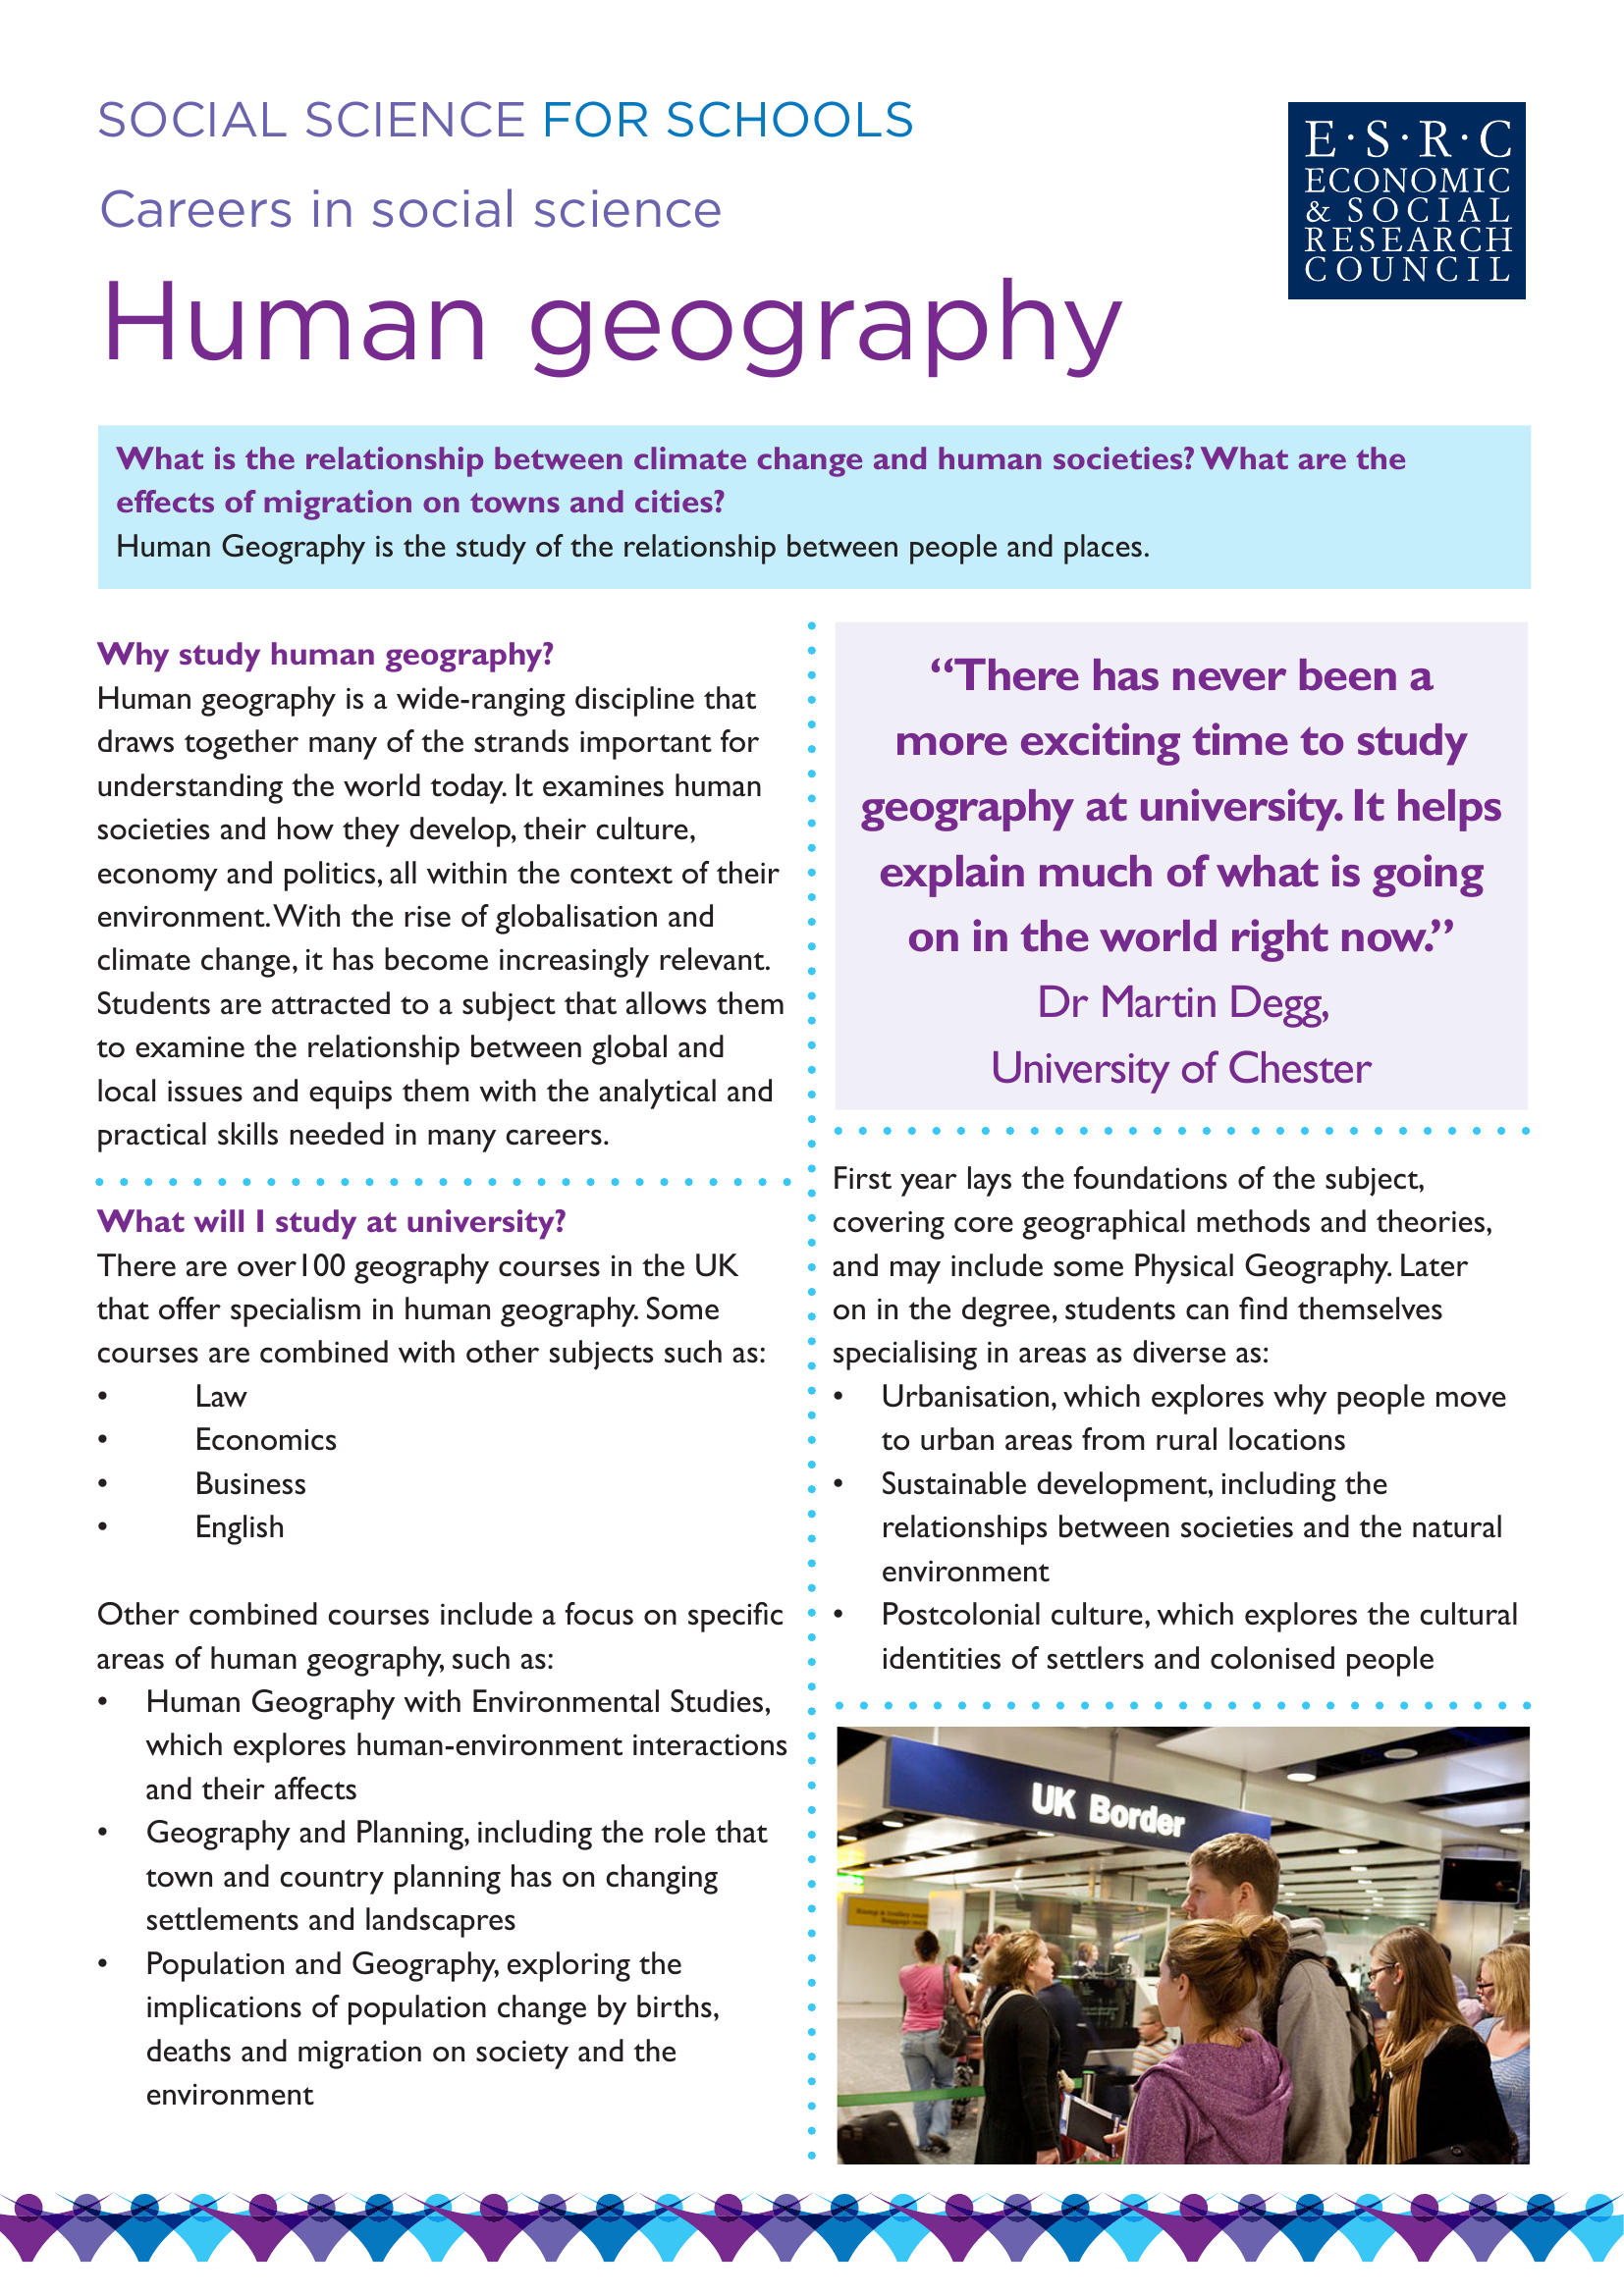

In [ ]:
from IPython.display import display, Image
display(images[0])

**Converting the text into an array & returning the bounding ranges**

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8, decoder='beamsearch')
bounds

[([[96, 96], [938, 96], [938, 150], [96, 150]],
  'SOCIAL SCIENCE FOR SCHOOLS',
  0.7098614770474913),
 ([[1324, 116], [1544, 116], [1544, 166], [1324, 166]],
  'E. S-RC',
  0.693267027318485),
 ([[1325, 163], [1543, 163], [1543, 203], [1325, 203]],
  'ECONOMIC',
  0.9999678529698919),
 ([[96, 183], [743, 183], [743, 245], [96, 245]],
  'Careers in social science',
  0.9342467494561316),
 ([[1327, 227], [1545, 227], [1545, 263], [1327, 263]],
  'RESEARCH',
  0.999816612096646),
 ([[1329, 195], [1543, 195], [1543, 233], [1329, 233]],
  '& SOCIAL',
  0.8826388282378234),
 ([[1327, 257], [1543, 257], [1543, 293], [1327, 293]],
  'C OUNCIL',
  0.9626918517535724),
 ([[98, 269], [1155, 269], [1155, 403], [98, 403]],
  'Human geography',
  0.9068012686950713),
 ([[118, 444], [1438, 444], [1438, 493], [118, 493]],
  'What is the relationship between climate change and human societies? What are the',
  0.8054652813553862),
 ([[114, 487], [744, 487], [744, 537], [114, 537]],
  'effects of migra

**Drawing the bounding boxes**

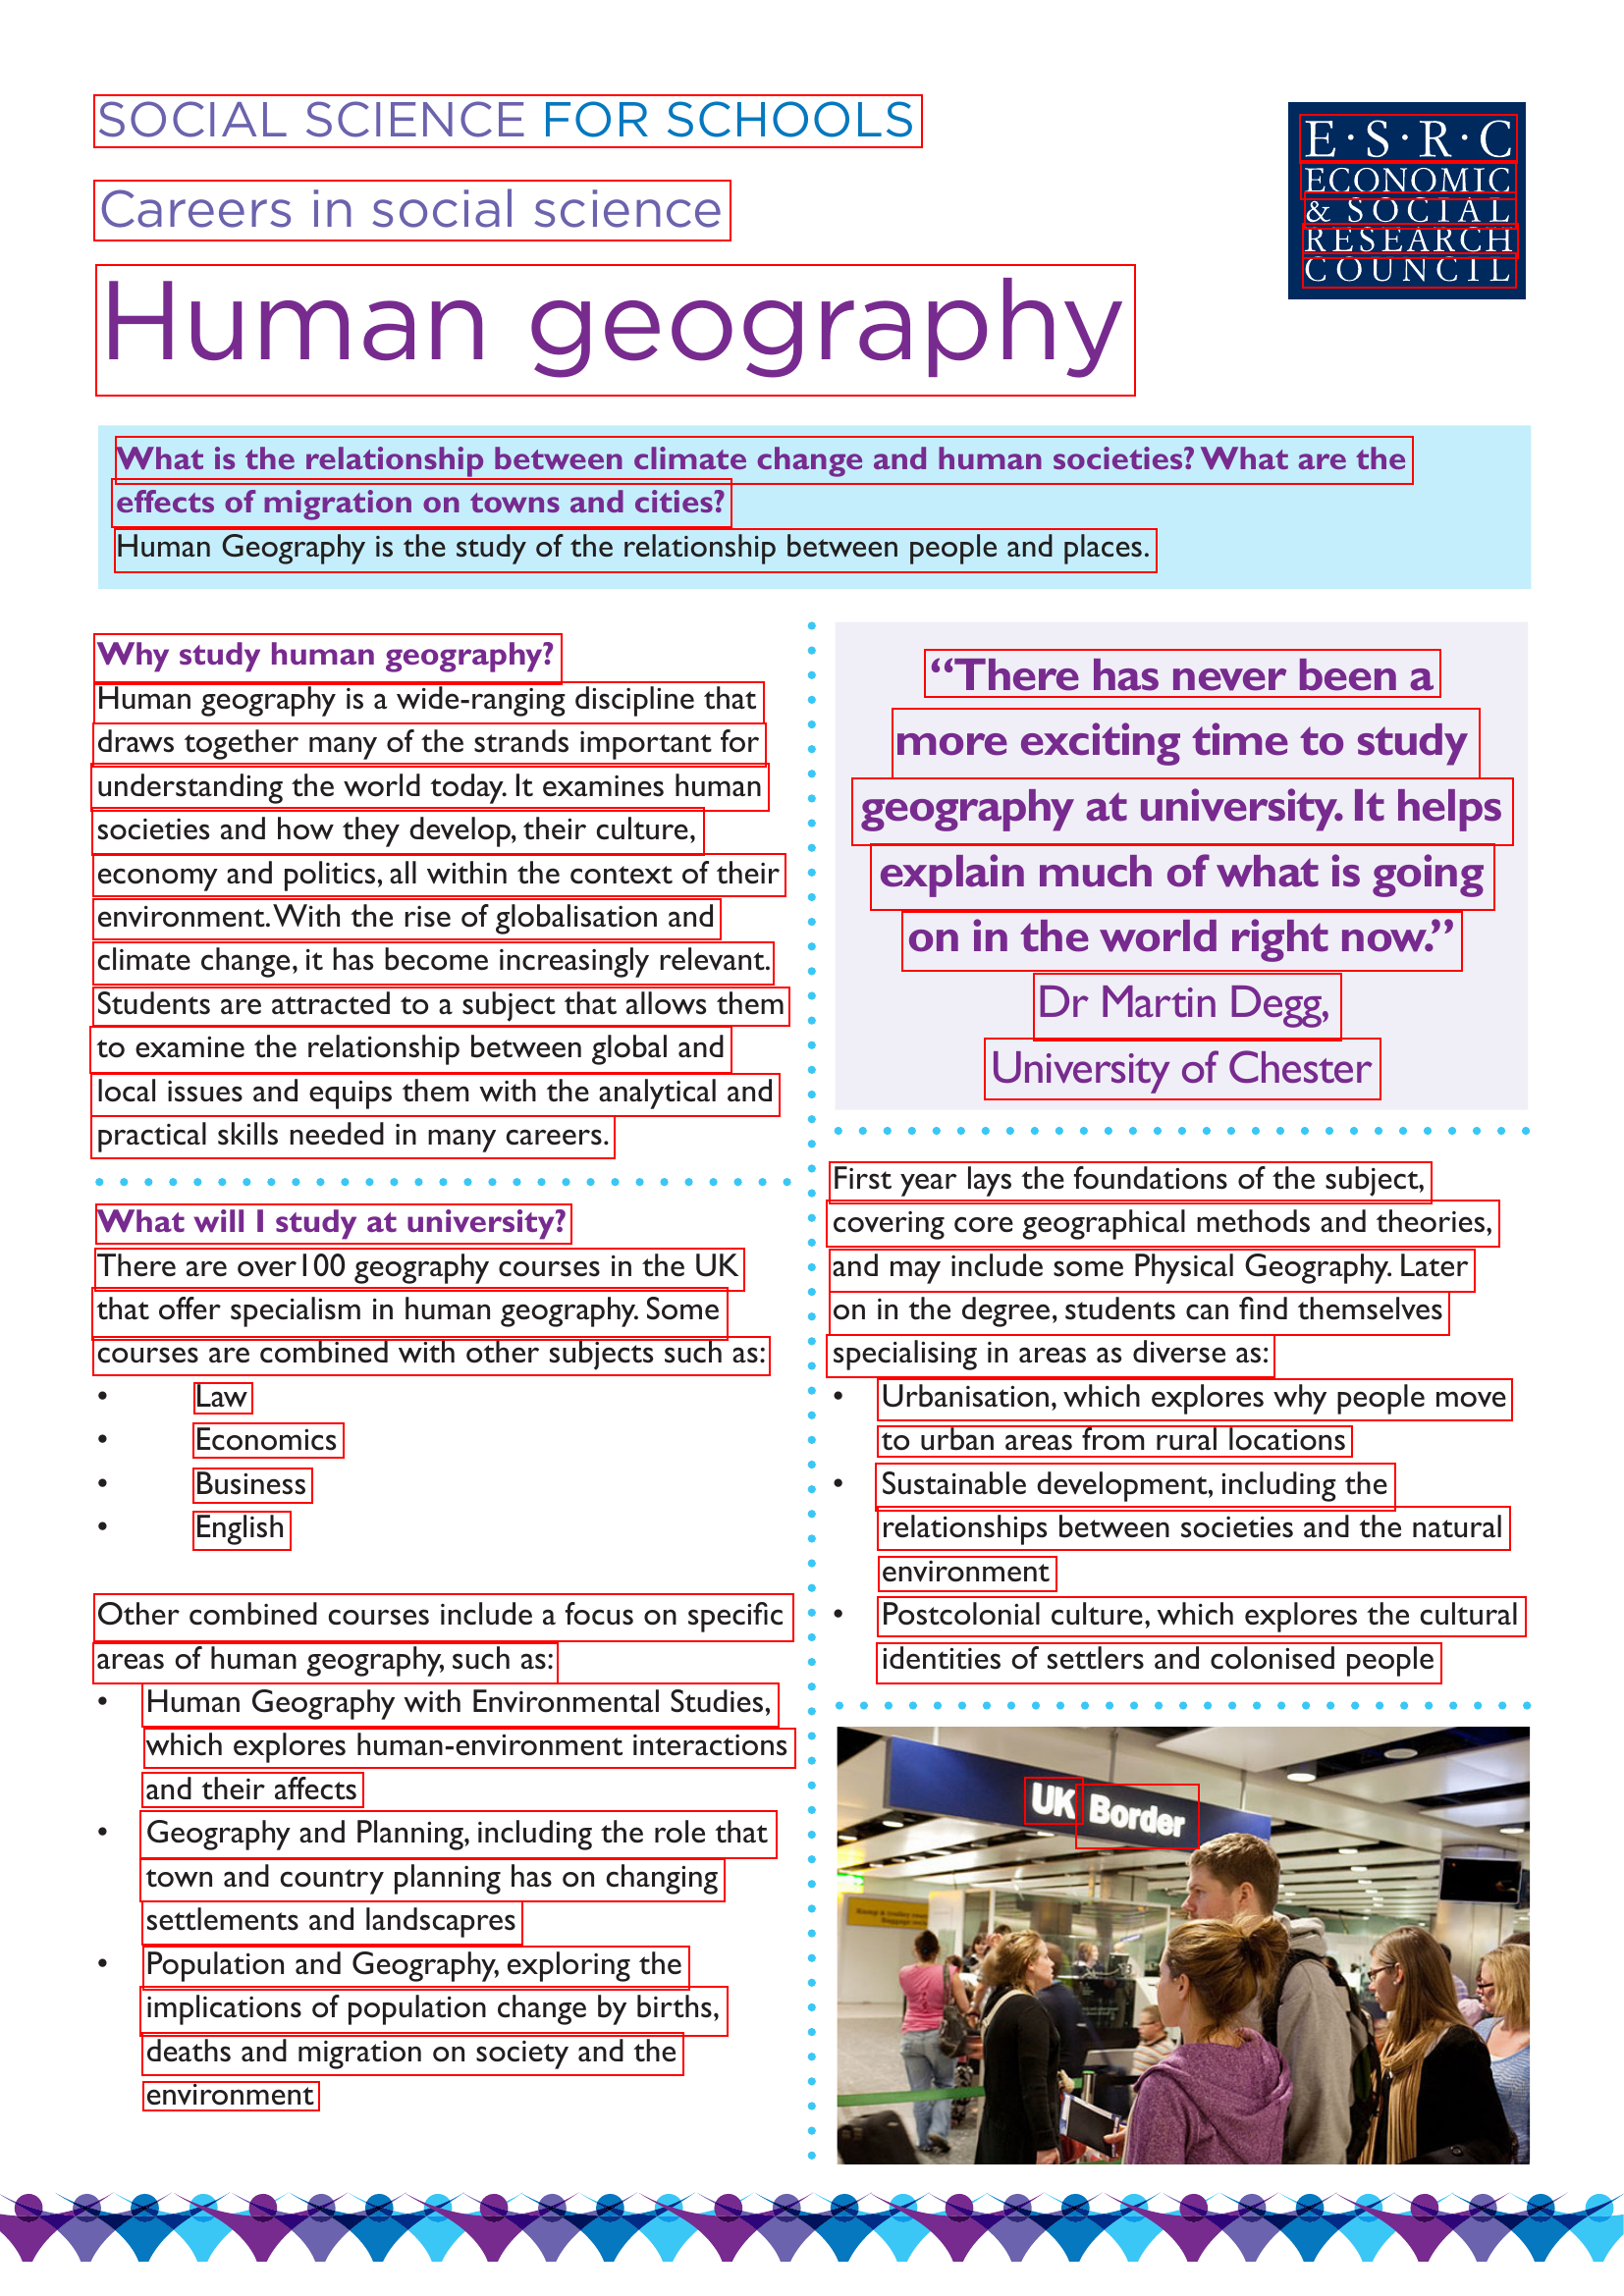

In [ ]:
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [ ]:
bounds[2][1]

'ECONOMIC'

**Printing text from the pdf**

In [ ]:
text = ''
for i in range(len(bounds)):
    text = text + bounds[i][1] + '\n'

print(text)

SOCIAL SCIENCE FOR SCHOOLS
E. S-RC
ECONOMIC
Careers in social science
RESEARCH
& SOCIAL
C OUNCIL
Human geography
What is the relationship between climate change and human societies? What are the
effects of migration on towns and cities?
Human Geography is the study of the relationship between people and places
Why study human geography?
(There has never been a
Human geography is a wide-ranging discipline that
draws together many of the strands important for
more exciting time to study
understanding the world today: It examines human
geography at university It helps
societies and how they develop; their culture,
economy and politics, all within the context of their
explain much of what is going
environment With the rise of globalisation and
on in the world right now?
climate change, it has become increasingly relevant:
Students are attracted to a subject that allows them
Dr Martin Degg
to examine the relationship between global and
University of Chester
local issues and equips them with

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

**Rich representation of the named entity**

In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text), style='ent', jupyter=True)